## 04-4 분류용 데이터 세트를 준비합니다

### 유방암 데이터 세트 준비하기

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### 입력 데이터 확인하기

In [2]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [3]:
print(cancer.data[:3])  # 30 features

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


### 박스 플롯으로 특성의 사분위 관찰하기



In [4]:
import matplotlib.pyplot as plt
import numpy as np

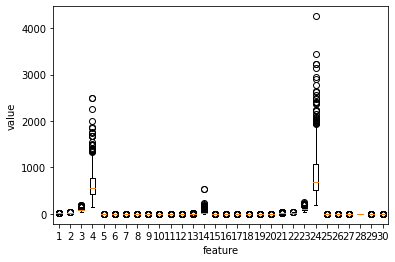

In [5]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

### 눈에 띄는 특성 살펴보기

In [6]:
# 4, 14, 24번째 특성이 다른 특성보다 값의 분포가 훨씬 크다
print(cancer.feature_names[[3, 13, 23]])  # 전부 넓이와 관련된 특성

['mean area' 'area error' 'worst area']


### 타깃 데이터 확인하기

In [7]:
# np.unique로 고유한 값을 찾아 반환
print(np.unique(cancer.target, return_counts=True))

# (array([0, 1]), array([212, 357]))
# array([0, 1]): np.target 안에는 0, 1만이 존재
# array([212, 357]): 타깃 데이터의 고유한 값의 개수를 센 값

(array([0, 1]), array([212, 357]))


### 훈련 데이터 세트 저장하기

In [8]:
x = cancer.data
y = cancer.target

## 04-5 로지스틱 회귀를 위한 뉴런을 만듭니다

### train_test_split() 함수로 훈련 데이터 세트 나누기

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

### 결과 확인하기

In [11]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


### unique() 함수로 훈련 세트의 타깃 확인하기

In [12]:
print(np.unique(y_train, return_counts=True))

(array([0, 1]), array([170, 285]))


### 로지스틱 회귀 구현하기

In [13]:
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식
        return z
    
    def backdrop(self, x, err):
        w_grad = x * err        # 가중치에 대한 gradient 계산
        b_grad = 1 * err        # 절편에 대한 gradient 계산
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해 추가
        a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])    # 가중치 초기화
        self.b = 0                      # 절편 초기화
        for i in range(epochs):         # epochs만큼 반복
            for x_i, y_i in zip(x, y):  # 모든 샘플에 대해 반복
                z = self.forpass(x_i)   # 정방향 계산
                a = self.activation(z)  # 활성화 함수 적용
                err = -(y_i - a)        # 오차 계산
                w_grad, b_grad = self.backdrop(x_i, err)  # 역방향 계산
                self.w -= w_grad        # 가중치 업데이트
                self.b -= b_grad        # 절편 업데이트

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용 - 정방향 계산 (뉴런에 x_i 입력)
        a = self.activation(np.array(z))      # 활성화 함수 적용 (뉴런 내에서 활성화 함수 이용해 a 추출)
        return a > 0.5                        # 계단 함수 적용 (결과값 도출)

### 모델 훈련하기

In [14]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

### 테스트 세트 사용해 모델의 정확도 평가하기

In [15]:
np.mean(neuron.predict(x_test) == y_test)  # 예측값을 넣고 예측한 값이 맞는지 비교

# predict() 메소드의 반환값은 True/False로 이루어진 (m,) 크기의 배열이고,
# y_test는 0/1로 이루어진 (m,) 크기의 배열이므로 바로 비교 가능

# 올바르게 예측한 샘플의 비율
# 0.8245614035087719

0.8245614035087719

## 04-6 로지스틱 회귀 뉴런으로 단일층 신경망을 만듭니다

In [16]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식
        return z

    def backdrop(self, x, err):
        w_grad = x * err        # 가중치에 대한 gradient 계산
        b_grad = 1 * err        # 절편에 대한 gradient 계산
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해 추가
        a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])    # 가중치 초기화
        self.b = 0                      # 절편 초기화
        for i in range(epochs):         # epochs만큼 반복
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))  # 인덱스 섞음
            for i in indexes:               # 모든 샘플에 대해 반복
                z = self.forpass(x[i])      # 정방향 계산
                a = self.activation(z)      # 활성화 함수 적용
                err = -(y[i] - a)           # 오차 계산
                w_grad, b_grad = self.backdrop(x[i], err)  # 역방향 계산
                self.w -= w_grad            # 가중치 업데이트
                self.b -= b_grad            # 절편 업데이트
                a = np.clip(a, 1e-10, 1-1e-10)  # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1-a))  # 에포크마다 평균 손실을 저장
            self.losses.append(loss/len(y))

    def predict(self, x):
        # 0보다 큰지 작은지만 비교하면 되므로, 굳이 시그모이드 적용 필요 없음
        z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용 - 정방향 계산 (뉴런에 x_i 입력)
        return np.array(z) > 0                # 계단 함수 적용 (결과값 도출)

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

### 단일층 신경망 훈련하기

#### 1. 단일층 신경망 훈련하고 정확도 출력하기

In [17]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

# 0.9298245614035088
# 정확도가 훨씬 올라간 것을 확인할 수 있다.

0.9298245614035088

#### 2. 손실 함수 누적값 확인하기

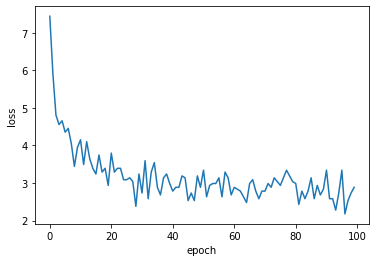

In [18]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 04-7 사이킷런으로 로지스틱 회귀를 수행합니다

### 사이킷런으로 경사 하강법 적용하기

사이킷런에 SGD (Stochastic Gradient Descent)가 이미 구현되어 있다.

#### 1. 로지스틱 손실 함수 지정하기

*   SGDClassifier 클래스에 로지스틱 회귀를 적용하려면 `loss` 매개변수에 손실 함수로 log를 지정한다.
*   `max_iter`을 통해 반복 횟수를 100으로 지정한다.
*   반복 실행했을 때 결과를 재현하기 위해 `random_state`의 난수 초깃값을 42로 지정한다.
*   반복할 때마다 로지스틱 손실 함수의 값이 `tol`에 지정한 값만큼 감소되지 않으면 반복을 중단하도록 한다. 만약 `tol`을 설정하지 않으면 `max_iter`의 값을 늘리라는 경고가 발생한다.

In [19]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

#### 2. 사이킷런으로 훈련하고 평가하기

In [20]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

#### 3. 사이킷런으로 예측하기

In [21]:
# 주의: 사이킷런은 입력 데이터로 2차원 배열만 받아들이므로,
# 샘플 하나만 주입하더라도 2차원 배열로 만들어야 한다.
# 이 예제에서는 배열의 슬라이싱을 이용하도록 한다.
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])